![Decision Tree](golf/Title.jpg "Title")

In [2]:
# Configure the necessary Spark environment
import os
import sys

# Spark home
spark_home = os.environ.get("SPARK_HOME")

# If Spark V1.4.x is detected, then add ' pyspark-shell' to
# the end of the 'PYSPARK_SUBMIT_ARGS' environment variable
spark_release_file = spark_home + "/RELEASE"
if os.path.exists(spark_release_file) and "Spark 1.4" in open(spark_release_file).read():
    pyspark_submit_args = os.environ.get("PYSPARK_SUBMIT_ARGS", "")
    if not "pyspark-shell" in pyspark_submit_args: pyspark_submit_args += " pyspark-shell"
    os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args

# Add the spark python sub-directory to the path
sys.path.insert(0, spark_home + "/python")

# Add the py4j to the path.
# You may need to change the version number to match your install
sys.path.insert(0, os.path.join(spark_home, "python/lib/py4j-0.8.2.1-src.zip"))

# Initialize PySpark to predefine the SparkContext variable 'sc'
execfile(os.path.join(spark_home, "python/pyspark/shell.py"))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.2.0
      /_/

Using Python version 2.7.13 (default, Dec 20 2016 23:05:08)
SparkSession available as 'spark'.


In [24]:
path="golf/golf.csv"
df = sqlContext.read.format('com.databricks.spark.csv') \
     .options(header='true', inferschema='true').load(path)
    

In [25]:
panda_df=df.toPandas()
panda_df.head(10)

,Play,Outlook,NumericalTemp,NumericalHumidity,Windy
0,0.0,sunny,85,85,False
1,0.0,sunny,80,90,True
2,1.0,overcast,83,86,False
3,1.0,rainy,70,96,False
4,1.0,rainy,68,80,False
5,0.0,rainy,65,70,True
6,1.0,overcast,64,65,True
7,0.0,sunny,72,95,False
8,1.0,sunny,69,70,False
9,1.0,sunny,75,80,False


In [26]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Outlook", outputCol="OutlookIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+----+--------+-------------+-----------------+-----+------------+
|Play| Outlook|NumericalTemp|NumericalHumidity|Windy|OutlookIndex|
+----+--------+-------------+-----------------+-----+------------+
| 0.0|   sunny|           85|               85|false|         0.0|
| 0.0|   sunny|           80|               90| true|         0.0|
| 1.0|overcast|           83|               86|false|         2.0|
| 1.0|   rainy|           70|               96|false|         1.0|
| 1.0|   rainy|           68|               80|false|         1.0|
| 0.0|   rainy|           65|               70| true|         1.0|
| 1.0|overcast|           64|               65| true|         2.0|
| 0.0|   sunny|           72|               95|false|         0.0|
| 1.0|   sunny|           69|               70|false|         0.0|
| 1.0|   sunny|           75|               80|false|         0.0|
| 1.0|   sunny|           75|               70| true|         0.0|
| 1.0|overcast|           72|               90| true|         

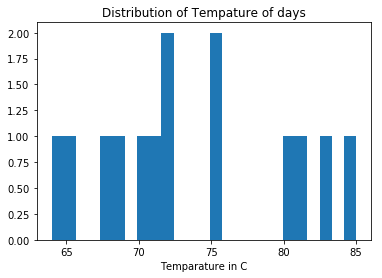

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.hist(df.toPandas()['NumericalTemp'], bins = 25)
plt.xlabel('Temparature in C')
plt.title('Distribution of Tempature of days')

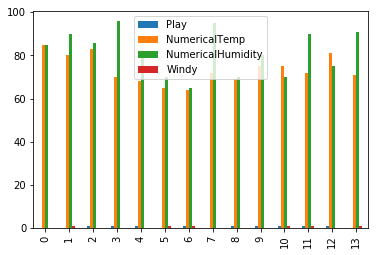

In [28]:
df.toPandas().plot(kind='bar')

In [29]:
from pyspark.mllib.regression import LabeledPoint

outlook = {"sunny": 0.0, "overcast": 1.0, "rainy": 2.0}

labeledpoints = [

    LabeledPoint(0.0, [outlook["sunny"],85,85,False]),

    LabeledPoint(0.0, [outlook["sunny"],80,90,True]),

    LabeledPoint(1.0, [outlook["overcast"],83,86,False]),

    LabeledPoint(1.0, [outlook["rainy"],70,96,False]),

    LabeledPoint(1.0, [outlook["rainy"],68,80,False]),

    LabeledPoint(0.0, [outlook["rainy"],65,70,True]),

    LabeledPoint(1.0, [outlook["overcast"],64,65,True]),

    LabeledPoint(0.0, [outlook["sunny"],72,95,False]),

    LabeledPoint(1.0, [outlook["sunny"],69,70,False]),

    LabeledPoint(1.0, [outlook["sunny"],75,80,False]),

    LabeledPoint(1.0, [outlook["sunny"],75,70,True]),

    LabeledPoint(1.0, [outlook["overcast"],72,90,True]),

    LabeledPoint(1.0, [outlook["overcast"],81,75,False]),

    LabeledPoint(0.0, [outlook["rainy"],71,91,True])

    ]

data = sc.parallelize(labeledpoints)

In [30]:
from pyspark.mllib.tree import DecisionTree

model = DecisionTree.trainClassifier(data=data,

         numClasses=2,

         categoricalFeaturesInfo={0: 3})

## Decision tree Structure of the model 

    feature  feature Name
    -------  ------------
    feature0 Outlook
    feuture1 NumericalTemp
    feature2 NumericalHumidity
    feautre3 Windy
    feature4 OutlookIndex

In [10]:
print(model.toDebugString())

DecisionTreeModel classifier of depth 3 with 9 nodes
  If (feature 0 in {0.0,2.0})
   If (feature 2 <= 80.0)
    If (feature 1 <= 65.0)
     Predict: 0.0
    Else (feature 1 > 65.0)
     Predict: 1.0
   Else (feature 2 > 80.0)
    If (feature 1 <= 70.0)
     Predict: 1.0
    Else (feature 1 > 70.0)
     Predict: 0.0
  Else (feature 0 not in {0.0,2.0})
   Predict: 1.0



![Decision Tree](golf/DecisionTree.jpg "Title")

![Decision Tree](golf/DecisionTree2.jpg "Title")

In [11]:
labeledpoints

[LabeledPoint(0.0, [0.0,85.0,85.0,0.0]),
 LabeledPoint(0.0, [0.0,80.0,90.0,1.0]),
 LabeledPoint(1.0, [1.0,83.0,86.0,0.0]),
 LabeledPoint(1.0, [2.0,70.0,96.0,0.0]),
 LabeledPoint(1.0, [2.0,68.0,80.0,0.0]),
 LabeledPoint(0.0, [2.0,65.0,70.0,1.0]),
 LabeledPoint(1.0, [1.0,64.0,65.0,1.0]),
 LabeledPoint(0.0, [0.0,72.0,95.0,0.0]),
 LabeledPoint(1.0, [0.0,69.0,70.0,0.0]),
 LabeledPoint(1.0, [0.0,75.0,80.0,0.0]),
 LabeledPoint(1.0, [0.0,75.0,70.0,1.0]),
 LabeledPoint(1.0, [1.0,72.0,90.0,1.0]),
 LabeledPoint(1.0, [1.0,81.0,75.0,0.0]),
 LabeledPoint(0.0, [2.0,71.0,91.0,1.0])]

In [18]:
#outlook = {"sunny": 0.0, "overcast": 1.0, "rainy": 2.0}

In [15]:
model.predict([0.0,80,90,True])

0.0

In [19]:
#Actual.   outlook.  temp. humidity. windy
# 1.0, [outlook["sunny"],69,70,False]

model.predict([0.0,69,70,False])

1.0

In [22]:
model.predict([2.0,71.0,91.0,1.0])

0.0

In [23]:
model.predict([0.0,85.0,85.0,0.0])

0.0